# Gatsiva Condition History Transaction

This notebook shows how to use and visualize the Gatsiva [Condition History](https://gatsiva.com/docs/#condition-history) transaction with Matplot.

The purpose of the condition history transaction is to show when an event was true in the past for any particular  condition and symbol set. It returns a true or false value for every data point in our price history for any given cryptocurrency pair.

API access is **currently limited to beta testers and collaborators**. For more information on how to utilize the Gatsiva API or to request access and an API key, please visit the [Gatsiva Website](https://gatsiva.com). For more information on the Gatsiva API, please visit the [Gatsiva API Documentation](https://gatsiva.com/docs).

## Enter Input Information Here

In [1]:
symbol = 'BTC:USD:daily' # The symbol
condition = 'bollinger range(14,2) crosses below 0' # The condition

graph_from = '2015-12-04' # From what date to visualize the results
apikey = "<your_api_key>" # Your particular API key

#### Python code to get the results - see results further below

In [2]:
# Import utility libraries we will need
import requests
import json
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

# Import datetime for some time processing
from datetime import datetime

# Ignore warnings
warnings.filterwarnings('ignore')

# Allow matplotlib to render inline (needed for pandas plotting)
%matplotlib inline

# Form the request
request_data = {'symbol':symbol,'condition':condition}
bearer_token = 'Bearer ' + apikey
my_headers = {'Accept': 'application/json', 'Authorization': bearer_token}

# Send the request
analytic = requests.post('https://api.gatsiva.com/api/v1/conditions/history',json=request_data,headers=my_headers)

# Pull out the results and format it into a pandas data frame
results = analytic.json()['results']

# At the moment the data structure looks like this
#
#  {'1515441600': False,
#   '1515438000': False,
#   '1515434400': False,
#
# We need to convert the string keys into timestamps


# Because the timestamp marks the beginning of the period, we need to modify the timestamp appropriately
price_type = symbol.split(':')[2]

ts_offset = 0

if price_type == 'daily':
    ts_offset = 86400
elif price_type == 'hourly':
    ts_offset = 3600

keys = []
for n in results.keys():
    # Because the timestamp marks the beginning of the period, we need to modify the timestamp appropriately
    keys.append(pd.Timestamp(datetime.utcfromtimestamp(int(n) + ts_offset)))

# And we need to convert the values into a numpy array
values = np.array(list(results.values()))

# Now make a data frame with pandas
df = pd.DataFrame(values, index=keys, columns=['result'])


# Results

In [3]:
# Preview the results in the dataframe
df.head()

,result
2018-02-24,False
2018-02-23,False
2018-02-22,False
2018-02-21,False
2018-02-20,False


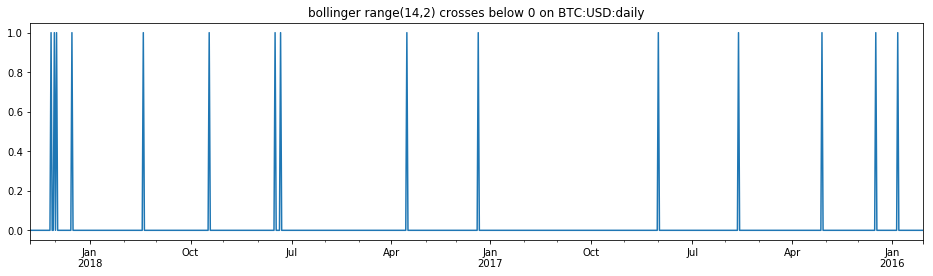

In [4]:
# Create a list that only includes items beyond the time we want
dftime = df[:graph_from]

# Visualize the results in a line chart
dftime.plot(legend=False, figsize=(16,4), title=condition + ' on ' + symbol)

In [5]:
# View a table of when this event was true 
df[df.result == True]

,result
2018-02-05,True
2018-02-02,True
2018-01-31,True
2018-01-17,True
2017-11-13,True
2017-09-14,True
2017-07-16,True
2017-07-11,True
2017-03-18,True
2017-01-12,True
